In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('data.csv')

## Data Preprocessing

In [3]:
data.tail()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
5139,Gerard Gordeau,Kevin Rosier,Joao Alberto Barreto,1993-11-12,"Denver, Colorado, USA",Red,False,Open Weight,1,0.0,...,1.0,0.0,0.0,1.0,Orthodox,195.58,NaN,216.0,NaN,34.0
5140,Ken Shamrock,Patrick Smith,Joao Alberto Barreto,1993-11-12,"Denver, Colorado, USA",Red,False,Open Weight,1,0.0,...,0.0,0.0,0.0,0.0,Orthodox,185.42,182.88,205.0,30.0,29.0
5141,Royce Gracie,Art Jimmerson,Joao Alberto Barreto,1993-11-12,"Denver, Colorado, USA",Red,False,Open Weight,1,0.0,...,0.0,0.0,0.0,0.0,Southpaw,185.42,NaN,175.0,30.0,26.0
5142,Kevin Rosier,Zane Frazier,Joao Alberto Barreto,1993-11-12,"Denver, Colorado, USA",Red,False,Open Weight,1,0.0,...,0.0,0.0,0.0,0.0,Orthodox,193.04,NaN,275.0,NaN,NaN
5143,Gerard Gordeau,Teila Tuli,Joao Alberto Barreto,1993-11-12,"Denver, Colorado, USA",Red,False,Open Weight,1,0.0,...,0.0,0.0,0.0,0.0,Orthodox,195.58,NaN,216.0,24.0,34.0


In [4]:
print(data.dtypes)
data.count()

R_fighter        object
B_fighter        object
Referee          object
date             object
location         object
                 ...   
R_Height_cms    float64
R_Reach_cms     float64
R_Weight_lbs    float64
B_age           float64
R_age           float64
Length: 145, dtype: object


R_fighter       5144
B_fighter       5144
Referee         5121
date            5144
location        5144
                ... 
R_Height_cms    5140
R_Reach_cms     4828
R_Weight_lbs    5141
B_age           4972
R_age           5080
Length: 145, dtype: int64

In [5]:
data.dropna(subset=['Referee'],inplace=True)

In [6]:
data.count()

R_fighter       5121
B_fighter       5121
Referee         5121
date            5121
location        5121
                ... 
R_Height_cms    5117
R_Reach_cms     4805
R_Weight_lbs    5118
B_age           4949
R_age           5057
Length: 145, dtype: int64

In [7]:
data['R_Height_cms'] =data['R_Height_cms'].fillna(179.29064195485637)

In [8]:
data['R_Weight_lbs'] = data['R_Weight_lbs'].fillna(data['R_Weight_lbs'].mean())

In [9]:
data['R_age'] = data['R_age'].fillna(data['R_age'].mode())

In [10]:
data['B_age'] = data['B_age'].fillna(data['B_age'].mode())

In [11]:
data.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,...,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,...,0.0,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,32.0,31.0
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,...,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0
3,Jimmie Rivera,Petr Yan,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0.0,...,1.0,0.0,0.0,6.0,Orthodox,162.56,172.72,135.0,26.0,29.0
4,Tai Tuivasa,Blagoy Ivanov,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,0.0,...,2.0,0.0,0.0,3.0,Southpaw,187.96,190.50,264.0,32.0,26.0


In [12]:
data['R_Reach_cms'] = data['R_Reach_cms'].fillna(data['R_Reach_cms'].mean())

In [13]:
data.columns

Index(['R_fighter', 'B_fighter', 'Referee', 'date', 'location', 'Winner',
       'title_bout', 'weight_class', 'no_of_rounds', 'B_current_lose_streak',
       ...
       'R_win_by_KO/TKO', 'R_win_by_Submission',
       'R_win_by_TKO_Doctor_Stoppage', 'R_wins', 'R_Stance', 'R_Height_cms',
       'R_Reach_cms', 'R_Weight_lbs', 'B_age', 'R_age'],
      dtype='object', length=145)

In [14]:
data['R_Stance'] = data['R_Stance'].fillna(data['R_Stance'].mode())

In [15]:
data['B_avg_DISTANCE_att'] = data['B_avg_DISTANCE_att'].fillna(data['B_avg_DISTANCE_att'].mean())

In [16]:
data.columns[:20]

Index(['R_fighter', 'B_fighter', 'Referee', 'date', 'location', 'Winner',
       'title_bout', 'weight_class', 'no_of_rounds', 'B_current_lose_streak',
       'B_current_win_streak', 'B_draw', 'B_avg_BODY_att', 'B_avg_BODY_landed',
       'B_avg_CLINCH_att', 'B_avg_CLINCH_landed', 'B_avg_DISTANCE_att',
       'B_avg_DISTANCE_landed', 'B_avg_GROUND_att', 'B_avg_GROUND_landed'],
      dtype='object')

In [17]:
data.to_csv('data_cleaned.csv')

## Data visualization

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
#R_age vs R_win
#R_age vs R_stance
#Stance vs winner bubble plot


In [50]:
set(data['Winner'].values)

{'Blue', 'Draw', 'Red'}

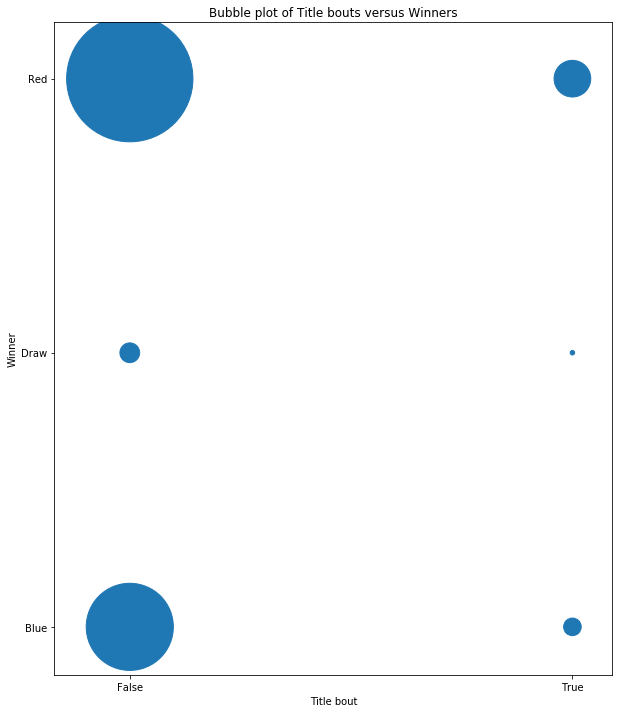

In [125]:
label_x, x = np.unique(data['title_bout'], return_inverse=True)
label_y, y = np.unique(data['Winner'], return_inverse=True)
xy, cnts = np.unique((x,y), axis=1, return_counts=True)
plt.figure(figsize=(10,12))
plt.scatter(xy[0], xy[1], s=cnts*5)
plt.xticks(range(len(label_x)), label_x)
plt.yticks(range(len(label_y)), label_y)
plt.title('Bubble plot of Title bouts versus Winners')
plt.xlabel('Title bout')
plt.ylabel('Winner')
plt.show()

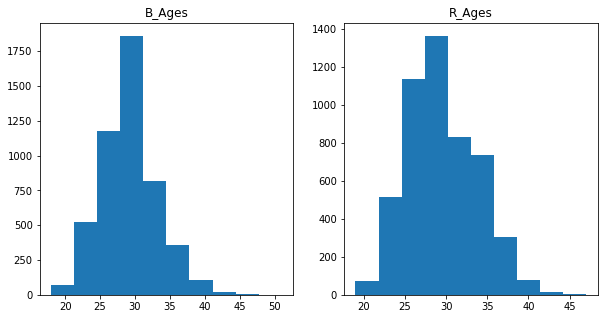

In [99]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(data['B_age'])
plt.title('B_Ages')
plt.subplot(1,2,2)
plt.hist(data['R_age'])
plt.title('R_Ages')
plt.show()

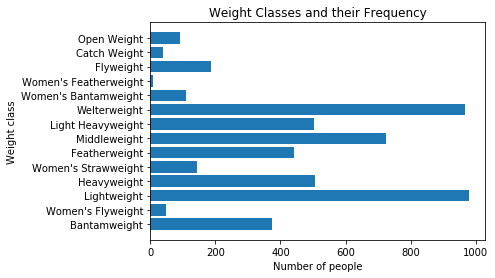

In [87]:
import collections
counts = collections.Counter(data['weight_class'])
plt.barh(range(len(counts)), list(counts.values()), tick_label=list(counts.keys()))
plt.xlabel('Number of people')
plt.ylabel('Weight class')
plt.title('Weight Classes and their Frequency')
plt.show()

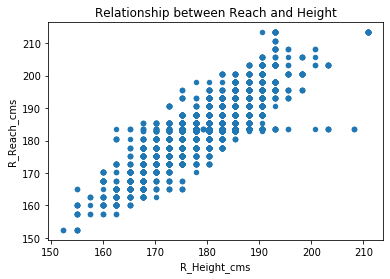

In [142]:
data.plot(kind='scatter',x='R_Height_cms',y='R_Reach_cms',title='Relationship between Reach and Height')
plt.show()

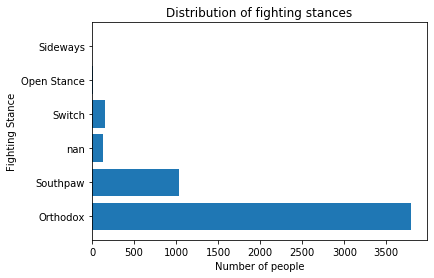

In [130]:
counts = collections.Counter(data['R_Stance'])
plt.barh(range(len(counts)), list(counts.values()), tick_label=list(counts.keys()))
plt.xlabel('Number of people')
plt.ylabel('Fighting Stance')
plt.title('Distribution of fighting stances')
plt.show()